In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
import os 
import glob as gb 
import cv2 
import tensorflow as tf
import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.callbacks import EarlyStopping
from tensorflow. keras. optimizers import Adam
from keras.src.legacy.preprocessing.image import ImageDataGenerator

In [62]:
trainpath = ''
testpath = ''

In [63]:
import os
import glob as gb

train_dir = os.path.join(trainpath, 'train')
if not os.path.exists(train_dir):
    print(f"Path does not exist: {train_dir}")
else:
    for folder in os.listdir(train_dir):
        folder_path = os.path.join(train_dir, folder)
        files = gb.glob(pathname=os.path.join(folder_path, '*.jpg'))
        print(f'For training data, found {len(files)} files in folder {folder}')


For training data, found 3993 files in folder angry
For training data, found 436 files in folder disgust
For training data, found 4103 files in folder fear
For training data, found 7164 files in folder happy
For training data, found 4982 files in folder neutral
For training data, found 4938 files in folder sad
For training data, found 3205 files in folder surprise


In [64]:
for folder in  os.listdir(testpath +'Validation') : 
    files = gb.glob(pathname= str( testpath +'Validation//' + folder + '/*.jpg'))
    print(f'For testing data , found {len(files)} in folder {folder}')

For testing data , found 960 in folder angry
For testing data , found 111 in folder disgust
For testing data , found 1018 in folder fear
For testing data , found 1825 in folder happy
For testing data , found 1216 in folder neutral
For testing data , found 1139 in folder sad
For testing data , found 797 in folder surprise


now how about the images sizes in train folder

In [65]:
size = []
for folder in  os.listdir(trainpath +'Train') : 
    files = gb.glob(pathname= str( trainpath +'Train//' + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(48, 48)    28821
dtype: int64

In [66]:
size = []
for folder in  os.listdir(testpath +'Validation') : 
    files = gb.glob(pathname= str( testpath +'Validation//' + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts() 

(48, 48)    7066
dtype: int64

In [67]:
s = 36

In [68]:
code = {'angry':0 ,'disgust':1,'fear':2,'happy':3,'neutral':4,'sad':5,'surprise':6}
def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x    

In [69]:
X_train = [] 
y_train = [] 
for folder in  os.listdir(trainpath +'train') : 
    files = gb.glob(pathname= str( trainpath +'train//' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s)) 
        X_train.append(list(image_array))
        y_train.append(code[folder])

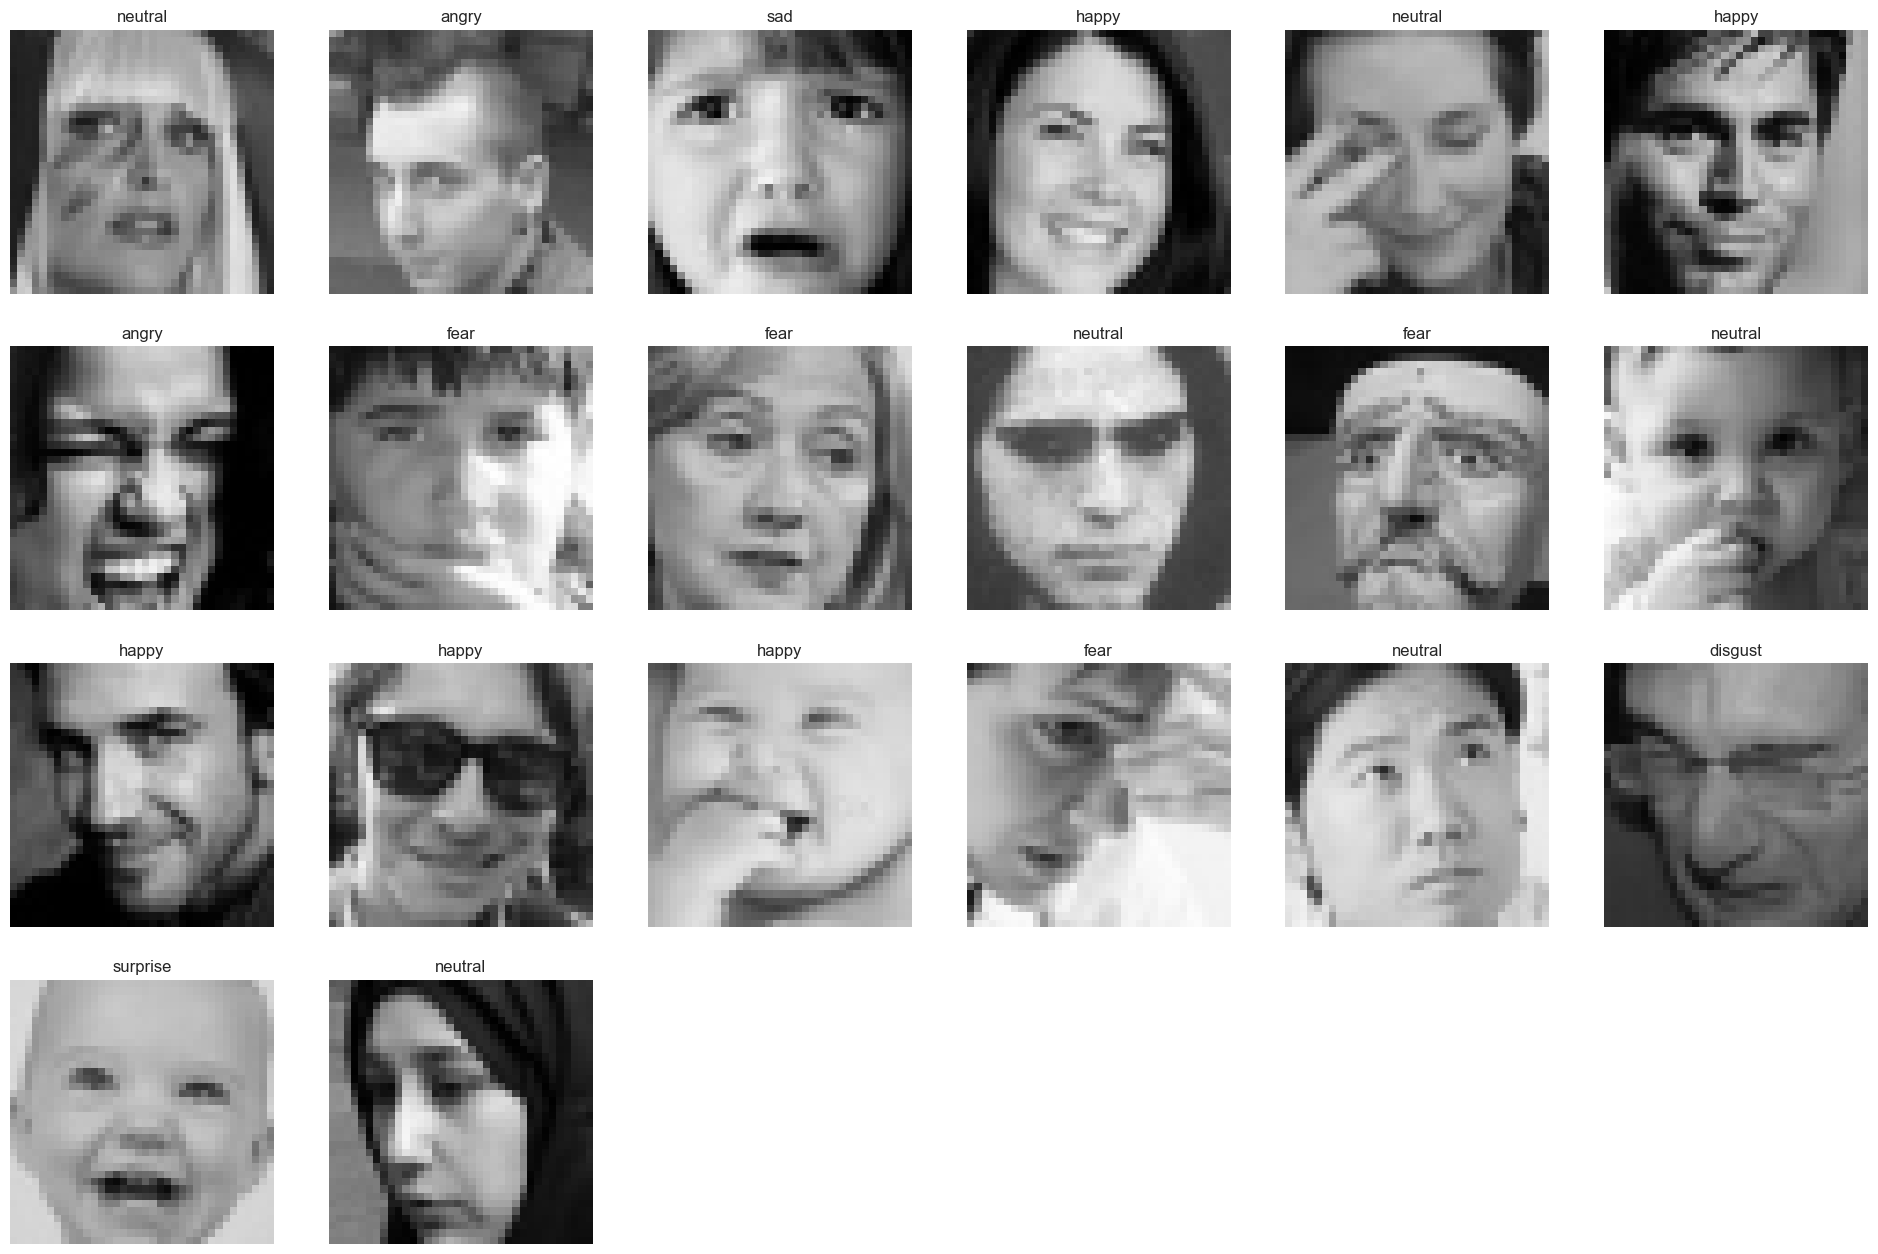

In [70]:
plt.figure(figsize=(24,24))
for n , i in enumerate(list(np.random.randint(0,len(X_train),20))) : 
    
    plt.subplot(6,6,n+1) 
    plt.imshow(X_train[i])  
    plt.axis('off')
    plt.title(getcode(y_train[i])) 

In [71]:
X_test = []
y_test = []
for folder in  os.listdir(testpath +'Validation') : 
    files = gb.glob(pathname= str(testpath + 'Validation//' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_test.append(list(image_array))
        y_test.append(code[folder])
        

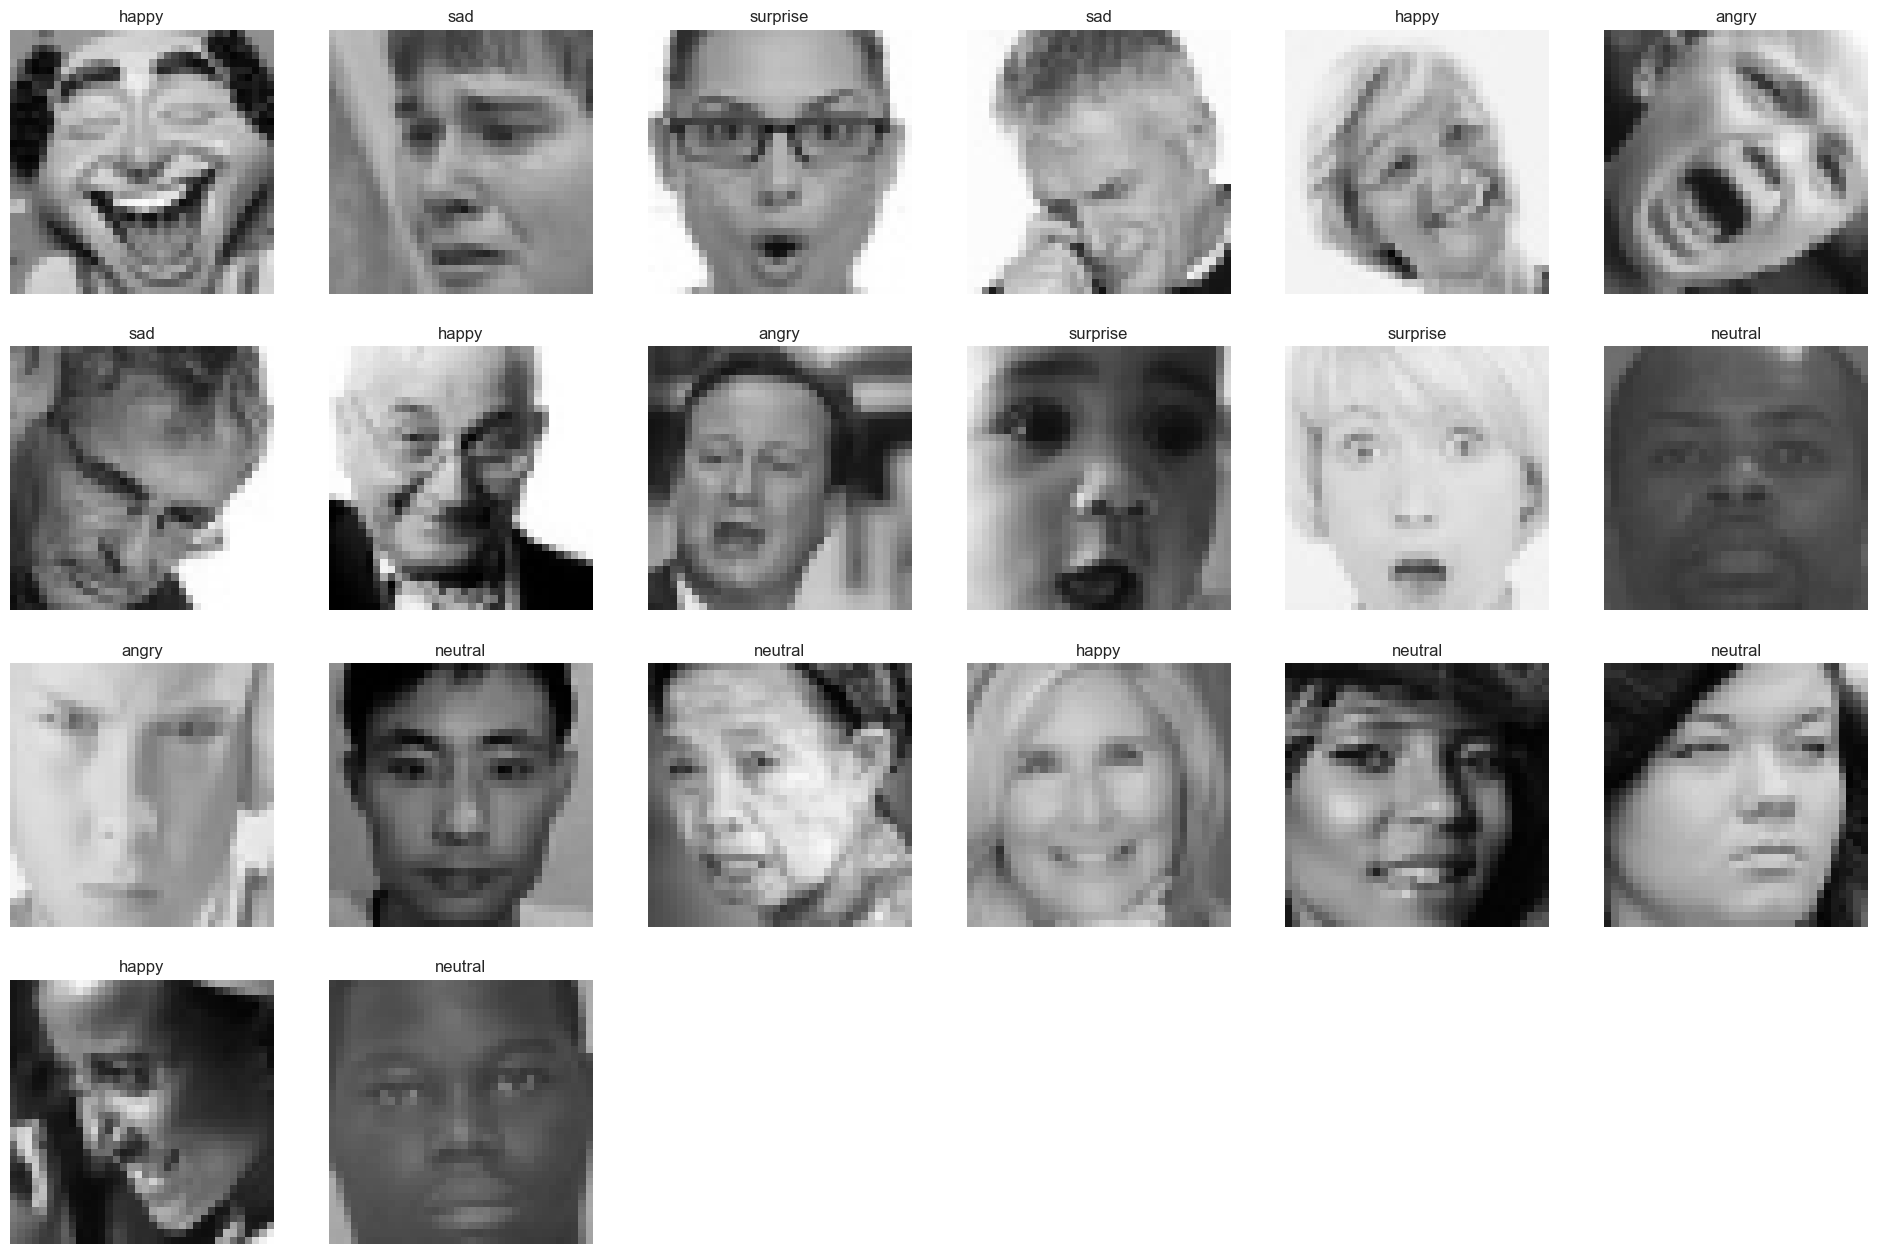

In [72]:
plt.figure(figsize=(24,24))
for n , i in enumerate(list(np.random.randint(0,len(X_test),20))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_test[i])    
    plt.axis('off')
    plt.title(getcode(y_test[i]))

In [73]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(f'X_train shape  is {X_train.shape}')
print(f'X_test shape  is {X_test.shape}')
print(f'y_train shape  is {y_train.shape}')
print(f'y_test shape  is {y_test.shape}')

X_train shape  is (28821, 36, 36, 3)
X_test shape  is (7066, 36, 36, 3)
y_train shape  is (28821,)
y_test shape  is (7066,)


In [74]:
Model = Sequential()
Model.add(Conv2D(256,kernel_size=(3,3),activation='relu',input_shape=(s,s,3))) 
Model.add(Conv2D(200,kernel_size=(3,3),activation='relu'))
Model.add(MaxPool2D(4,4))

Model.add(Conv2D(180,kernel_size=(3,3),activation='relu'))
Model.add(Conv2D(120,kernel_size=(3,3),activation='relu'))
Model.add(Conv2D(80,kernel_size=(3,3),activation='relu'))
Model.add(MaxPool2D(4,4))

Model.add(Flatten()) 
Model.add(Dense(140,activation='relu'))
Model.add(Dense(120,activation='relu'))
Model.add(Dense(80,activation='relu'))
Model.add(Dropout(0.2))

Model.add(Dense(7, activation = "softmax"))

c:\Users\linas\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [75]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(10, activation='softmax')
])

model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

c:\Users\linas\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [76]:
print(Model.summary())

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 34, 34, 256)    │         7,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 32, 32, 200)    │       461,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 8, 8, 200)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 6, 6, 180)      │       324,180 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 4, 4, 120)      │       194,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 2, 2, 80)       │        86,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 0, 0, 80)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 0)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 140)            │           140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 120)            │        16,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 80)             │         9,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 80)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 7)              │           567 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,100,655 (4.20 MB)

 Trainable params: 1,100,655 (4.20 MB)

 Non-trainable params: 0 (0.00 B)

None


In [77]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.5,min_lr=0.00001)

In [78]:
early_stop = EarlyStopping(monitor='val_loss', patience=3)

In [79]:
datagen = ImageDataGenerator()
datagen.fit(X_train) 

In [80]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

model = Sequential([
    Conv2D(256, (3, 3), activation='relu', input_shape=(36, 36, 3)),
    Conv2D(200, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(4, 4)),
    Conv2D(180, (3, 3), activation='relu'),
    Conv2D(120, (3, 3), activation='relu'),
    Conv2D(80, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(140, activation='relu'),
    Dense(120, activation='relu'),
    Dense(80, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')
])

model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience=2, verbose=1, factor=0.5, min_lr=0.00001)

epochs = 5

myModel = model.fit(X_train, y_train, epochs=epochs, batch_size=94, verbose=1, validation_data=(X_test, y_test),
                    callbacks=[learning_rate_reduction])


(28821, 36, 36, 3)
(28821,)
(7066, 36, 36, 3)
(7066,)
Epoch 1/5
307/307 ━━━━━━━━━━━━━━━━━━━━ 323s 1s/step - accuracy: 0.2255 - loss: 1.8589 - val_accuracy: 0.2583 - val_loss: 1.8091 - learning_rate: 0.0010
Epoch 2/5
307/307 ━━━━━━━━━━━━━━━━━━━━ 325s 1s/step - accuracy: 0.2467 - loss: 1.8145 - val_accuracy: 0.3377 - val_loss: 1.6723 - learning_rate: 0.0010
Epoch 3/5
307/307 ━━━━━━━━━━━━━━━━━━━━ 324s 1s/step - accuracy: 0.3447 - loss: 1.6476 - val_accuracy: 0.4103 - val_loss: 1.4971 - learning_rate: 0.0010
Epoch 4/5
307/307 ━━━━━━━━━━━━━━━━━━━━ 324s 1s/step - accuracy: 0.4157 - loss: 1.5101 - val_accuracy: 0.4333 - val_loss: 1.4458 - learning_rate: 0.0010
Epoch 5/5
307/307 ━━━━━━━━━━━━━━━━━━━━ 337s 1s/step - accuracy: 0.4615 - loss: 1.4046 - val_accuracy: 0.4822 - val_loss: 1.3461 - learning_rate: 0.0010


In [81]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(10, activation='softmax')
])

model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [83]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

model = Sequential([
    Conv2D(256, (3, 3), activation='relu', input_shape=(36, 36, 3)),
    Conv2D(200, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(4, 4)),
    Conv2D(180, (3, 3), activation='relu'),
    Conv2D(120, (3, 3), activation='relu'),
    Conv2D(80, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(140, activation='relu'),
    Dense(120, activation='relu'),
    Dense(80, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')
])
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

callbacks = [ReduceLROnPlateau(monitor='val_loss', patience=2, factor=0.5, min_lr=0.00001), 
             EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)]
model.fit(X_train, y_train, epochs=10, batch_size=94, validation_data=(X_test, y_test), callbacks=callbacks)

ModelLoss, ModelAccuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {ModelLoss}')
print(f'Test Accuracy: {ModelAccuracy}')


Epoch 1/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 318s 1s/step - accuracy: 0.2328 - loss: 1.8496 - val_accuracy: 0.2583 - val_loss: 1.8224 - learning_rate: 0.0010
Epoch 2/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 316s 1s/step - accuracy: 0.2492 - loss: 1.8215 - val_accuracy: 0.2583 - val_loss: 1.8113 - learning_rate: 0.0010
Epoch 3/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 317s 1s/step - accuracy: 0.2448 - loss: 1.8197 - val_accuracy: 0.2583 - val_loss: 1.8097 - learning_rate: 0.0010
Epoch 4/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 312s 1s/step - accuracy: 0.2473 - loss: 1.8159 - val_accuracy: 0.2583 - val_loss: 1.8096 - learning_rate: 0.0010
Epoch 5/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 322s 1s/step - accuracy: 0.2521 - loss: 1.8128 - val_accuracy: 0.2583 - val_loss: 1.8099 - learning_rate: 0.0010
Epoch 6/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 312s 1s/step - accuracy: 0.2488 - loss: 1.8130 - val_accuracy: 0.2583 - val_loss: 1.8088 - learning_rate: 0.0010
Epoch 7/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 320s 1s/step - accuracy: 0.2461 - loss: 1.

In [84]:
Model.save('Model.h5')

In [85]:
new_model = keras.models.load_model('Model.h5')

In [86]:
history = myModel

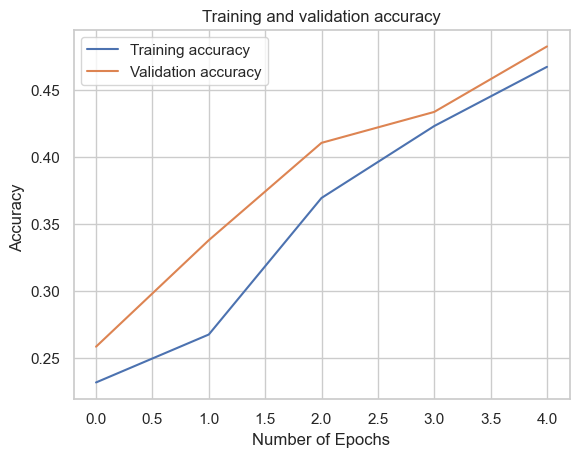

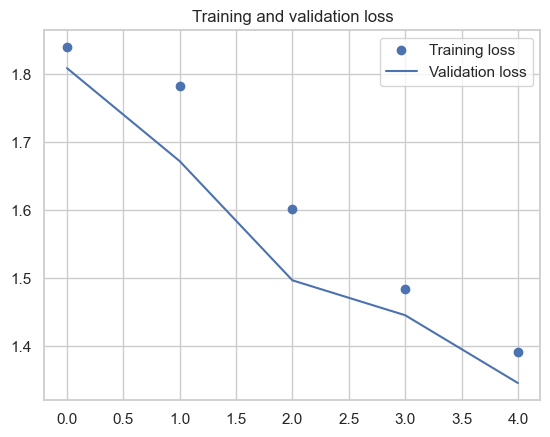

In [87]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy,  label='Training accuracy')
plt.plot(epochs, val_accuracy, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy ")
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()